### leer archivo

In [1]:
# instalar librerias en el sistema, mejor en la carpeta del proyecto
# windows 10= 
        # pip install pandas
        # pip install numpy
        # pip install seaborn
        # pip install matplotlib
        # pip install ipython

In [2]:
# importar las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import os
from IPython.display import Image

In [3]:
#elejir el archivo por consola
def my_name_file():
    #----------------------------------------------------------------
    while True:
        year = input("Que año quieres revisar?: \n")
        try:
            year = int(year)
            print("numero verificado: "+str(year))
            break
        except ValueError:
            print("Esto no es un numero")
    #----------------------------------------------------------------
    while True:
        print("Elije el mes que quieres revisar escribiendo su numero del 1 al 12: \n")

        while True:
            month = input("[1] Enero\n"+"[2] Febrero\n"+"[3] Marzo\n"+
                        "[4] Abril\n"+"[5] Mayo\n"+"[6] Junio\n"+
                        "[7] Julio\n"+"[8] Agosto\n"+"[9] Septiembre\n"+
                        "[10] Octubre\n"+"[11] Noviembre\n"+"[12] Diciembre\n")
            try:
                month = int(month)
                print("numero verificado: "+str(month))
                break
            except ValueError:
                print("Esto no es un numero")

        if month > 0 and month <= 12:
            if month == 1:
                month="January"
            elif month == 2:
                month="February"
            elif month == 3:
                month="March"
            elif month == 4:
                month="April"
            elif month == 5:
                month="May"
            elif month == 6:
                month="June"
            elif month == 7:
                month="July"
            elif month == 8:
                month="August"
            elif month == 9:
                month="September"
            elif month == 10:
                month="October"
            elif month == 11:
                month="November"
            elif month == 12:
                month="December"
            break
        else:
            print("No es un mes valido!\n pruebe de nuevo")
    #----------------------------------------------------------------
    while True:
        while True:
            day = input("Que dia del mes quieres revisar?")
            try:
                day = int(day)
                print("es un numero entero"+str(day))
                break
            except ValueError:
                print("No es un numero entero, pruebe de nuevo")
    
        if day > 0 and day <= 31:
            day = str(day)
            break
        else:
            print("No esta dentro del rango valido de dias")
    #----------------------------------------------------------------
    carta = str(day)+"_"+str(month)+"_"+str(year)
    return(carta)


In [4]:
# traeme el dataset que voy a utilizar en el proyecto
#route = "../code_text/loot/"
route = "../loot/"

while True:
    mensaje = my_name_file()
    print(mensaje)
    dataset = "doc_MaterialOxidationMachine_"+mensaje+".txt"

    try:
        df_sensors = pd.read_csv(route+dataset, sep=" ")
        break
    except FileNotFoundError:
        print("Archivo no Encontrado, prueba nuevamente")

# el dataframe es:
df_sensors.head(3)

Que año quieres revisar?: 
 2024


numero verificado: 2024
Elije el mes que quieres revisar escribiendo su numero del 1 al 12: 



[1] Enero
[2] Febrero
[3] Marzo
[4] Abril
[5] Mayo
[6] Junio
[7] Julio
[8] Agosto
[9] Septiembre
[10] Octubre
[11] Noviembre
[12] Diciembre
 3


numero verificado: 3


Que dia del mes quieres revisar? 6


es un numero entero6
6_March_2024


,fecha,hora,temp1,temp2,temp3,nivel
0,06_March_2024,161052,15,66,94,1
1,06_March_2024,161052,15,66,94,1
2,06_March_2024,161052,15,66,94,1


### Atributos del Dataframe

In [5]:
#Atributos del dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
df_sensors.dtypes #que tipo de elemento tiene cada columna de dataframe
df_sensors.info #informacion general del dataframe
df_sensors.keys() #debuelebe un array con lostitulos o head del dataframe, primera fila del dataframe
df_sensors.values #devuelve un array conformados de os arrays que contienen los valores de cada fila en el dataframe sin el head
df_sensors.ndim #devuelve el numero de dimenciones del dataframe
df_sensors.size #tamaño total de elementos en el dataframe
df_sensors.shape # total de (filas, columnas)
df_sensors.head(1) #retorna las n primeras filas
df_sensors.tail(2) #retorna las n ultimas filas
df_sensors.describe() #descripcion general estadistica del dataframe
df_sensors.keys()[2] #preguntar por el nombre de una columna especifica
df_sensors.columns[2]
df_sensors.max() #vaores maximos de cada columna
df_sensors.max()[2] #valor maximo de columna especifica
df_sensors.min()[2] #valor minimo de columna especifica

#la media de una clumna especifica, mean no se utiliza cuando hay columnas mixtas en tipo al parecer
df_temp = pd.DataFrame(df_sensors.loc[:, 'temp1'])
df_temp.mean()

df_temp.median() #valor de la mediana



temp1    46.0
dtype: float64

In [6]:
### a ver, los valores que me pueden llegar de la maquina son
"""
    Temperatura sensor cuneta 1
    Temperatura sensor cuneta 2
    valor sensor nivel de agua
    Temperatura agua  tanque
    precencia de Agua? bao nivel o nulo y precencia de agua recomendada o minima para funcionamiento
"""

'\n    Temperatura sensor cuneta 1\n    Temperatura sensor cuneta 2\n    valor sensor nivel de agua\n    Temperatura agua  tanque\n    precencia de Agua? bao nivel o nulo y precencia de agua recomendada o minima para funcionamiento\n'

### Temperatura sensor 1

In [7]:
# temperatura sensor 1

#Dataframe original de donde se extraeran los datos
print( "Columnas del dataframe original: \n"+str (df_sensors.keys()) )
print("Columna que se necesita: \n"+str(df_sensors.keys()[2])+" valor 2")

Columnas del dataframe original: 
Index(['fecha', 'hora', 'temp1', 'temp2', 'temp3', 'nivel'], dtype='object')
Columna que se necesita: 
temp1 valor 2


In [8]:
print("Creando nuevo dataframe")
df_temp = pd.DataFrame(df_sensors.loc[:, ['hora','temp1']])
df_temp.head(3)

Creando nuevo dataframe


,hora,temp1
0,161052,15
1,161052,15
2,161052,15


In [9]:
#Total de datos recogidos
print( "Total de datos registros: \n"+str(df_temp.count()[1]))
#Valor maximo registrado
print("Valor maximo registrados \n"+str( df_temp.max()[1] ) )
# Valor minimo registrado
print("Valor minimo registrados \n"+str( df_temp.min()[1] ) )

Total de datos registros: 
303
Valor maximo registrados 
99
Valor minimo registrados 
0


In [10]:
array_temp = []
array_hour = []
max_values_temp = df_temp.count()[1]
#max_values_temp = len(df_sensors.loc[:, 'temp'])

for i in range(0, max_values_temp):
    array_temp.append(df_temp.loc[:,'temp1'][i])
    array_hour.append(df_temp.loc[:,'hora'][i])

print("tamaño deldataframe columna temp: "+str(max_values_temp))
print( "tamaño del array: "+str(len(array_temp)) )
df_aux = pd.DataFrame(array_temp)

tamaño deldataframe columna temp: 303
tamaño del array: 303


In [11]:
# valor medio registrado
print("valor medio registrados \n"+str(df_aux.mean()) )
# valor mediano registrado
print("Valor mediano registrado: \n"+str(df_aux.median()))

valor medio registrados 
0    46.910891
dtype: float64
Valor mediano registrado: 
0    46.0
dtype: float64


In [12]:
import math

deci1, hora_min = math.modf( (int(df_temp.min()[0]))/10000 ) #columna de hora
deci2, hora_max = math.modf( (int(df_temp.max()[0]))/10000 ) #columna de hora

while True:
    print("La hora minima de este registro es: "+str(hora_min))
    print("La hora maxima de este registro es: "+str(hora_max))

    while True:
        init_hour = input("Selecciona una hora de inicio en formato 24h que quieras graficar: ")
        try:
            init_hour = int(init_hour)
            break
        except ValueError:
            print("Esto no es un numero, prueba de nuevo")

    # print(init_hour)
    # print(type(init_hour))
    # break

    if init_hour >= hora_min and init_hour <= hora_max:
        print("Hora de inicio aceptada: "+str(init_hour))
        break
    else:
        print("Tiene que estar la hora de inicio entre la hora minima y la hora maxima del registro")

while True:
    print("La hora minima de este registro es: "+str(hora_min))
    print("La hora maxima de este registro es: "+str(hora_max))

    while True:
        finish_hour = input("Selecciona una hora de finalizacion en formato 24h que quieras graficar: ")
        try:
            finish_hour = int(finish_hour)
            break
        except ValueError:
            print("Esto no es un numero, prueba de nuevo")

    if finish_hour >= hora_min and finish_hour <= hora_max:
        print("Hora de Finalizacion aceptada: "+str(finish_hour))
        break
    else:
        print("Tiene que estar la hora de finalizacion entre la hora minima y la hora maxima del registro")



La hora minima de este registro es: 16.0
La hora maxima de este registro es: 16.0


Selecciona una hora de inicio en formato 24h que quieras graficar:  16


Hora de inicio aceptada: 16
La hora minima de este registro es: 16.0
La hora maxima de este registro es: 16.0


Selecciona una hora de finalizacion en formato 24h que quieras graficar:  16


Hora de Finalizacion aceptada: 16


In [32]:
df_temp = pd.DataFrame(df_sensors.loc[:, ['hora','temp2']])
df_temp.head(3)

,hora,temp2
0,161052,66
1,161052,66
2,161052,66


# HERE!

In [13]:
# aqui lllegan las variables init_hour y finish_hour

init    = int(init_hour) * 10000
finish  = int(finish_hour) * 10000

array_temp = []
array_hour = []
max_values_temp = df_temp.count()[1]
#max_values_temp = len(df_sensors.loc[:, 'temp'])

for i in range(0, max_values_temp):
    if df_temp.loc[:,'hora'][i] >= init and df_temp.loc[:,'hora'][i] <= (init+10999): 
        array_temp.append(df_temp.loc[:,'temp1'][i])
        array_hour.append(df_temp.loc[:,'hora'][i])

    elif df_temp.loc[:,'hora'][i] >= finish and df_temp.loc[:,'hora'][i] <= (finish+10999):
        array_temp.append(df_temp.loc[:,'temp1'][i])
        array_hour.append(df_temp.loc[:,'hora'][i])

print("tamaño deldataframe columna temp: "+str(max_values_temp))
print( "tamaño del array: "+str(len(array_temp)) )
print( init )
print( finish )
#df_aux = pd.DataFrame(array_temp)

tamaño deldataframe columna temp: 303
tamaño del array: 303
160000
160000


Text(0.5, 1.0, 'Historial de Registro de Temperatura\nHora Inicio: 16:00:00 Hora Final: 16:00:00')

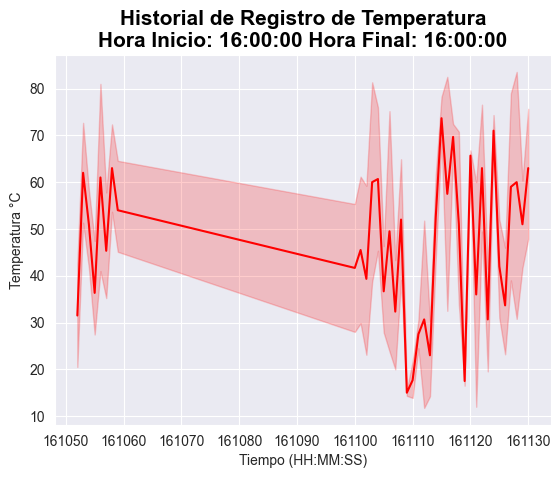

In [14]:
# aqui lllegan las variables init_hour y finish_hour

import numpy as np

x = np.array(array_hour)
y = np.array(array_temp)
# Conjunto de datos
df = {'Tiempo (HH:MM:SS)': x, 'Temperatura °C': y}
sns.set_style("darkgrid")
sns.lineplot(x="Tiempo (HH:MM:SS)",
             y="Temperatura °C", 
             data=df, 
             markers="o", 
             color="red").set_title("Historial de Registro de Temperatura\n"+
                                    "Hora Inicio: "+str(init_hour)+":00:00"
                                        " Hora Final: "+str(finish_hour)+":00:00", 
                                    fontdict = {"fontsize": 15,
                                    "fontweight":"bold",
                                    "color":"black"})



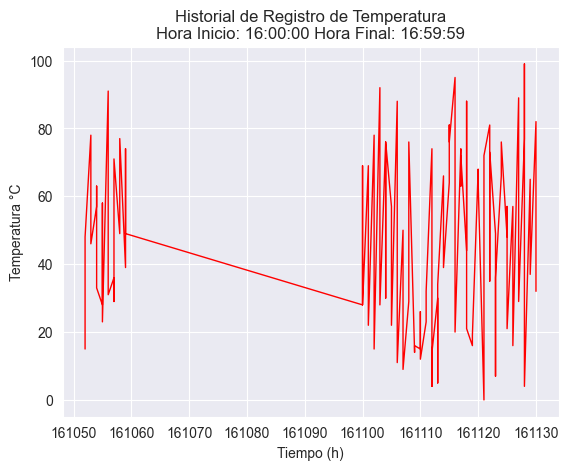

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array(array_hour)
y = np.array(array_temp)

# Gráfico de líneas
fig, ax = plt.subplots()
plt.title("Historial de Registro de Temperatura\n"+
            "Hora Inicio: "+str(init_hour)+":00:00"
            " Hora Final: "+str(finish_hour)+":59:59")
plt.xlabel("Tiempo (h)")
plt.ylabel("Temperatura °C")
ax.plot(x, y, marker = "o", markersize = 0, color="red", linewidth = 1)
# ax.plot(x, y, marker = "o", ms = 5) # Equivalente
# plt.show() 


In [28]:
print(array_temp)
print(array_hour)

[15, 15, 15, 48, 48, 48, 78, 78, 78, 46, 46, 46, 57, 57, 57, 63, 63, 63, 33, 33, 33, 28, 28, 28, 58, 58, 58, 23, 23, 23, 91, 91, 91, 31, 31, 31, 36, 36, 36, 29, 29, 29, 71, 71, 71, 49, 49, 49, 77, 77, 77, 39, 39, 39, 74, 74, 74, 49, 49, 49, 28, 28, 28, 69, 69, 69, 28, 28, 28, 69, 69, 69, 22, 22, 22, 78, 78, 78, 25, 25, 25, 15, 15, 15, 92, 92, 92, 28, 28, 28, 76, 76, 76, 30, 30, 30, 76, 76, 76, 57, 57, 57, 31, 31, 31, 22, 22, 22, 88, 88, 88, 11, 11, 11, 50, 50, 50, 38, 38, 38, 9, 9, 9, 29, 29, 29, 51, 51, 51, 76, 76, 76, 14, 14, 14, 16, 16, 16, 15, 15, 15, 26, 26, 26, 12, 12, 12, 23, 23, 23, 32, 32, 32, 74, 74, 74, 4, 4, 4, 14, 14, 14, 30, 30, 30, 5, 5, 5, 34, 34, 34, 66, 66, 66, 39, 39, 39, 64, 64, 64, 81, 81, 81, 76, 76, 76, 95, 95, 95, 20, 20, 20, 74, 74, 74, 63, 63, 63, 72, 72, 72, 44, 44, 44, 88, 88, 88, 21, 21, 21, 16, 16, 16, 19, 19, 19, 68, 68, 68, 65, 65, 65, 64, 64, 64, 0, 0, 0, 72, 72, 72, 81, 81, 81, 35, 35, 35, 73, 73, 73, 49, 49, 49, 7, 7, 7, 36, 36, 36, 66, 66, 66, 76, 76

In [29]:
df_sensors.keys()


Index(['fecha', 'hora', 'temp1', 'temp2', 'temp3', 'nivel'], dtype='object')

In [16]:
df_temp.dtypes

hora     int64
temp1    int64
dtype: object

### Nivel

In [16]:
# Nivel de agua
df_nivel = pd.DataFrame(df_sensors.loc[:, 'nivel'])
df_nivel.head(3)

,nivel
0,1
1,1
2,1


In [20]:
dataframe = df_nivel.copy()
max = int(dataframe.count())
lista = []
for i in range(0, max):
    lista.append(dataframe.loc[:,"nivel"][i])

conteo = dict(zip(lista,map(lambda x: lista.count(x),lista)))
print(conteo)

{1: 809, 0: 831}


C:\Users\ruiso\AppData\Local\Temp\ipykernel_28980\450327163.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  max = int(dataframe.count())


In [26]:
#total de datos por count
print(dataframe.count())
#total de datos por suma hayada
suma = conteo[0] + conteo[1]
print(suma)

nivel    1640
dtype: int64
1640


In [30]:
conteo[1]

809

In [31]:
conteo[0]

831

In [41]:
print("Porcentaje de Nivel Tanque Lleno ["
      +str(conteo[1])+"/"+str(suma)+"]: "
      +str(round( ((conteo[1] * 100)/suma) ,2)) +"%")

Porcentaje de Nivel Tanque Lleno [809/1640]: 49.33%


In [43]:
print("Porcentaje de Nivel Tanque Vacio ["
      +str(conteo[0])+"/"+str(suma)+"]: "
      +str(round( ((conteo[0] * 100)/suma) ,2)) +"%")

Porcentaje de Nivel Tanque Vacio [831/1640]: 50.67%


In [17]:
# Temperatura sensor 2

In [18]:
# Temperatura Tanque